## matrix factorization techniques for recommender systems keras
## submitted by Rahul Srinivas and Nikita kumari


In [14]:
import pandas as pd
import numpy as np
from pathlib import Path

load movie data set

In [15]:
#movie data set
DATA_FOLDER = Path('ml-latest-small')
MOVIES_FILEPATH = DATA_FOLDER / 'movies.csv'
RATINGS_FILEPATH = DATA_FOLDER / 'ratings.csv'

In [16]:
ratings = pd.read_csv(RATINGS_FILEPATH)
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [17]:
#each unique value is assigned a number from zeroi.e, category code
ratings.userId = ratings.userId.astype('category').cat.codes.values
ratings.movieId = ratings.movieId.astype('category').cat.codes.values


In [18]:
#split the data set
from sklearn.model_selection import train_test_split
train, test = train_test_split(ratings, test_size=0.2)

In [19]:
train.head()

,userId,movieId,rating,timestamp
14099,89,678,3.0,856354513
17654,110,7329,1.5,1516153265
21734,140,1444,4.0,1513131894
19460,124,8046,4.0,1474371841
42801,287,2687,3.5,1054569125


In [20]:
test.head()


,userId,movieId,rating,timestamp
69014,447,1772,3.0,1019127748
3672,21,1428,5.0,1268330620
56772,376,5425,2.5,1340344443
87979,566,7819,1.5,1525289067
1040,7,157,4.0,839463856


## create model
user input-embedding--vector
                                
                              
                          
movie input--embedding--vector



dotproduct(user vector * movie vector) = y pred , loss(y pred - y)

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


#number of users and movies
n_users, n_movies = len(ratings.userId.unique()), len(ratings.movieId.unique())
n_latent_factors = 3

In [9]:
print(n_users,n_movies)

610 9724


In [48]:
#create movie input of n movies * 1 coulmn
movie_input = keras.layers.Input(shape = [1], name = 'item')
# create embedding vector space of n_movies * n_latent_factors
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name = 'movie_emb')(movie_input)
#flatten into single vector 
movie_vec = keras.layers.Flatten(name = "Flatten_Movies")(movie_embedding)


user_input = keras.layers.Input(shape = [1], name = "User")
user_vec = keras.layers.Flatten(name = 'Flatten_Users')(keras.layers.Embedding(n_users + 1, n_latent_factors,
                                                                            name = 'user_emb')(user_input))

prod = keras.layers.dot([movie_vec, user_vec], axes = 1, name = "Dot_Product")

model = keras.Model([user_input, movie_input], prod)

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

In [24]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
item (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
User (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
Movie_Embedding (Embedding)     (None, 1, 3)         29175       item[0][0]                       
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 3)         1833        User[0][0]                       
____________________________________________________________________________________________

In [26]:
history = model.fit([train.userId, train.movieId], train.rating, epochs=100, verbose=1)


Train on 80668 samples
Epoch 1/100
80668/80668 [==============================] - 7s 87us/sample - loss: 0.8280 - mae: 0.6876 - mse: 0.8280
Epoch 2/100
80668/80668 [==============================] - 8s 93us/sample - loss: 0.7925 - mae: 0.6751 - mse: 0.7925
Epoch 3/100
80668/80668 [==============================] - 7s 93us/sample - loss: 0.7652 - mae: 0.6649 - mse: 0.7652
Epoch 4/100
80668/80668 [==============================] - 7s 93us/sample - loss: 0.7428 - mae: 0.6560 - mse: 0.7428
Epoch 5/100
80668/80668 [==============================] - 8s 99us/sample - loss: 0.7242 - mae: 0.6482 - mse: 0.7242
Epoch 6/100
80668/80668 [==============================] - 7s 90us/sample - loss: 0.7089 - mae: 0.6424 - mse: 0.7089
Epoch 7/100
80668/80668 [==============================] - 7s 91us/sample - loss: 0.6961 - mae: 0.6368 - mse: 0.6961
Epoch 8/100
80668/80668 [==============================] - 8s 95us/sample - loss: 0.6850 - mae: 0.6311 - mse: 0.6850
Epoch 9/100
80668/80668 [================

80668/80668 [==============================] - 8s 96us/sample - loss: 0.5187 - mae: 0.5304 - mse: 0.5187
Epoch 69/100
80668/80668 [==============================] - 8s 99us/sample - loss: 0.5182 - mae: 0.5298 - mse: 0.5182
Epoch 70/100
80668/80668 [==============================] - 8s 100us/sample - loss: 0.5171 - mae: 0.5292 - mse: 0.5171
Epoch 71/100
80668/80668 [==============================] - 7s 87us/sample - loss: 0.5163 - mae: 0.5294 - mse: 0.5163
Epoch 72/100
80668/80668 [==============================] - 7s 87us/sample - loss: 0.5152 - mae: 0.5284 - mse: 0.5152
Epoch 73/100
80668/80668 [==============================] - 8s 93us/sample - loss: 0.5141 - mae: 0.5279 - mse: 0.5141
Epoch 74/100
80668/80668 [==============================] - 7s 87us/sample - loss: 0.5135 - mae: 0.5276 - mse: 0.5135
Epoch 75/100
80668/80668 [==============================] - 7s 86us/sample - loss: 0.5125 - mae: 0.5269 - mse: 0.5125
Epoch 76/100
80668/80668 [==============================] - 7s 87us/

Text(0, 0.5, 'Training Error')

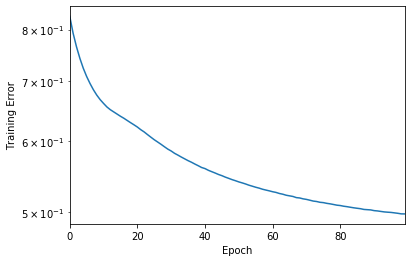

In [28]:
import matplotlib.pyplot as plt

pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Training Error")

In [30]:
y_hat_2 = np.round(model.predict([test.userId, test.movieId]))


In [32]:
#Pretty similar to the result we got using matrix factorisation
#predict and test almost same
from sklearn.metrics import mean_absolute_error
y_true = test.rating
print(mean_absolute_error(y_true, y_hat_2))
print(mean_absolute_error(y_true, model.predict([test.userId, test.movieId])))


0.7972034906783022
0.7979086339306727


In [49]:
user_embedding_learnt = model.get_layer(name='user_emb').get_weights()[0]
movie_embedding_learnt = model.get_layer(name='movie_emb').get_weights()[0]


In [44]:
#function to  recommend top 3 moveies for given user id
def recommend(user_id, number_of_movies=3):
    movies = user_embedding_learnt[user_id]@movie_embedding_learnt.T
    mids = np.argpartition(movies, -number_of_movies)[-number_of_movies:]
    return mids

In [45]:
recommend(user_id=1)


array([4039, 4116, 7097], dtype=int64)

In [57]:
!jupyter nbconvert matrix _factorization_assignment.ipynb --to html --output matrix _factorization_assignment.html

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options

-------



Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.


--debug

    set log level to logging.DEBUG (maximize logging output)

--generate-config

    generate default config file

-y

    Answer yes to any questions instead of prompting.

--execute

    Execute the notebook prior to export.

--allow-errors

    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.

--stdin

    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'

--stdout

    Write notebook output to stdout instead of files.

--inplace

    Run nbconvert in 

[NbConvertApp] WARNING | pattern 'matrix' matched no files
[NbConvertApp] WARNING | pattern '_factorization_assignment.ipynb' matched no files
[NbConvertApp] WARNING | pattern '_factorization_assignment.html' matched no files


In [ ]:
!$jupyter nbconvert --to html notebook.ipynb  